# Setup notebook

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
import sympy as sm
from scipy.integrate import trapz
import time
import mpmath
from scipy.integrate import simps

# Trapezoidal Method
<font size = 5>
<p>$\int_a^b f(x) dx \approx 0.5 * (f(a)+f(b)) * (a-b)$
</font>

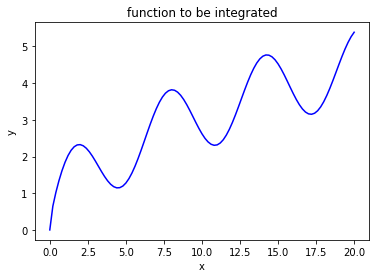

In [2]:
fx = lambda x: np.sin(x) + x**0.5
x = np.linspace(0,20,101)
y = fx(x)

plt.figure()
plt.plot(x,y,'b-')
plt.title('function to be integrated')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [3]:
#use step size of 2.5
x_node = np.array([i*2.5 for i in range(0,int(20//2.5) + 1)])

In [4]:
y_node = fx(x_node)

In [5]:
x_base = np.zeros(x_node.shape)

In [6]:
#create coordinate of vertical lines for plotting
v_line_start = [(i,j) for i,j in zip(x_node,x_base)]
v_line_start

[(0.0, 0.0),
 (2.5, 0.0),
 (5.0, 0.0),
 (7.5, 0.0),
 (10.0, 0.0),
 (12.5, 0.0),
 (15.0, 0.0),
 (17.5, 0.0),
 (20.0, 0.0)]

In [7]:
v_line_end = [(i,j) for i,j in zip(x_node,y_node)]
v_line_end

[(0.0, 0.0),
 (2.5, 2.1796109741881464),
 (5.0, 1.2771437028366512),
 (7.5, 3.6766127643005695),
 (10.0, 2.6182565492790095),
 (12.5, 3.469212008581537),
 (15.0, 4.5232711863645338),
 (17.5, 3.2076741272022202),
 (20.0, 5.3850812057272073)]

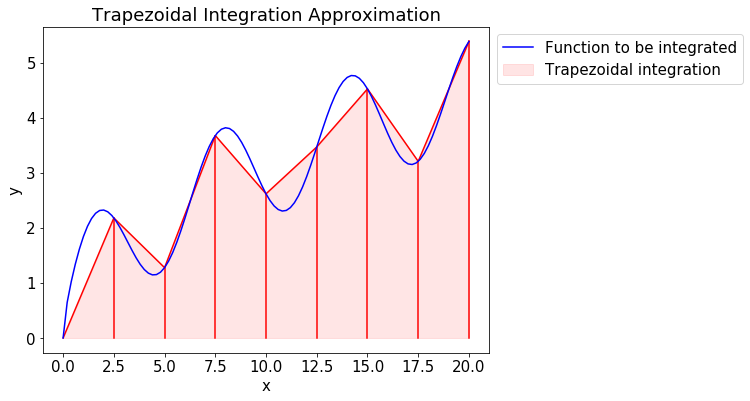

In [8]:
mpl.rc('font',size = 15)
plt.figure(figsize = (8,6))
plt.plot(x_node,y_node,'-r')
plt.fill_between(x_node,y_node,color = 'red', alpha = 0.1,
                 label = 'Trapezoidal integration')
for line in range(len(v_line_end)):
    x_line = [v_line_start[line][0],v_line_end[line][0]]
    y_line = [v_line_start[line][1],v_line_end[line][1]]
    plt.plot(x_line,y_line, '-r')
plt.plot(x,y,'b-', label = 'Function to be integrated')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Trapezoidal Integration Approximation')
plt.show()

## Trapezoidal Manual Integration

In [9]:
def T_man1():
    # using list comprehension
    x_node = np.array([i*2.5 for i in range(0,int(20//2.5) + 1)])
    y_node = fx(x_node)
    area_section = [(x_node[i+1]-x_node[i]) * 0.5 * (y_node[i+1] + y_node[i])
                    for i in range(x_node.shape[0]-1)]
    area_total = sum(area_section)
    print(area_total)
T_man1()

59.110804789


In [10]:
def T_man2():
    # using for-loop
    area_total = 0
    for i in range(x_node.shape[0] - 1):
        area_total += 0.5 * (y_node[i]  + y_node[i+1]) * (x_node[i+1] - x_node[i])
    print(area_total)
T_man2()

59.110804789


In [11]:
def T_man3():
    # using just numpy
    area = ((x_node[1:] - x_node[0:-1]) * (y_node[1:] + y_node[0:-1]) * 0.5).sum()
    print(area)
T_man3()

59.110804789


## Trapezoidal with Scipy (automatic)

In [12]:
#with input of x_node and y_node
trapz(y_node,x_node)

59.110804789040685

In [13]:
#with input of y and spacing
trapz(y_node,dx = 2.5)

59.110804789040685

In [14]:
#with finer discretization
for i in range(1,8):
    ans = trapz(fx(np.linspace(0,20,10**i)),np.linspace(0,20,10**i))
    print('i = {:}, integration result = {:}'.format(i,ans))

i = 1, integration result = 59.31141084919463
i = 2, integration result = 60.19988674564448
i = 3, integration result = 60.219792428047285
i = 4, integration result = 60.220378581412135
i = 5, integration result = 60.220396748580725
i = 6, integration result = 60.22039731957108
i = 7, integration result = 60.22039733759288


## Analytical Integration with Sympy

In [15]:
#analytical solution
xs = sm.symbols('x')
Eq = sm.sin(xs) + xs**0.5
ans_aly = sm.integrate(Eq,(xs,0,20))
ans_aly

-cos(20) + 60.6284793999944

In [16]:
ans_aly.evalf()

60.2203973381810

## Speed comparison

In [17]:
#speed of scipy.integrate.trapz

In [18]:
%%timeit -n 300 -r 30
trapz(y_node,x_node)

300 loops, best of 30: 8.83 µs per loop


In [19]:
class T_man3_obj():
    def __init__(self,x_node,y_node):
        self.x_node = x_node
        self.y_node = y_node
    def area(self):
        area = ((self.x_node[1:] - self.x_node[0:-1]) * 
                (self.y_node[1:] + self.y_node[0:-1]) * 0.5).sum()
        return area

In [20]:
int_obj = T_man3_obj(x_node,y_node)
int_obj.area()

59.110804789040685

In [21]:
#speed of manual integration with numpy array without printing and using object

In [22]:
%%timeit -n 300 -r 30
int_obj = T_man3_obj(x_node,y_node)
int_obj.area()

300 loops, best of 30: 4.78 µs per loop


In [23]:
t1 = time.monotonic()
for i in range(100000):
    trapz(y_node,x_node)
t2 = time.monotonic()
time_trapz = t2-t1
time_trapz

0.9482589669933077

In [24]:
t1 = time.monotonic()
for i in range(100000):
    int_obj = T_man3_obj(x_node,y_node)
    int_obj.area()
t2 = time.monotonic()
time_numpy_manual = t2-t1
time_numpy_manual

0.5139754059782717

In [25]:
print("numpy manual method take {:.2f}%".format(
    (time_trapz - time_numpy_manual)/time_numpy_manual*100)
      +" of the time taken by scipy.integrate.trapz for this particular case")

numpy manual method take 84.50% of the time taken by scipy.integrate.trapz for this particular case


In [26]:
# What if we put scipy.integrate.trapz inside a class?
# Will it be any faster?

In [27]:
class T_scipy():
    def __init__(self,x_node,y_node):
        self.x_node = x_node
        self.y_node = y_node
    def area(self):
        area = trapz(self.y_node,self.x_node)
        return area        

In [28]:
int_sp_obj = T_scipy(x_node,y_node)
int_sp_obj.area()

59.110804789040685

In [29]:
t1 = time.monotonic()
for i in range(100000):
    int_sp_obj = T_scipy(x_node,y_node)
    int_sp_obj.area()
t2 = time.monotonic()
t2-t1

1.0543863649945706

In [30]:
#putting scipy.integrate.trapz in an object form does not make it any faster

# Trapezoidal Method (non-uniform discretization)
Discretize more when the function change fast

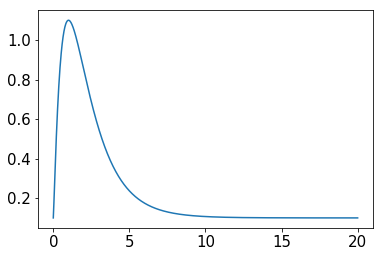

In [31]:
fx2 = lambda x: x**(-x**0.5)*x + 0.1
x2 = np.linspace(0,20,1000)
y2 = fx2(x2)

plt.figure()
plt.plot(x2,y2)
plt.show()

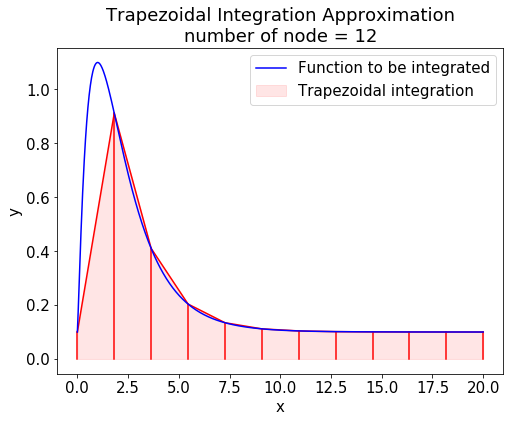

In [32]:
#use step size of 1
x2_node = np.linspace(0,20,12)
y2_node = fx2(x2_node)
x2_base = np.zeros(x2_node.shape)

v2_line_start = [(i,j) for i,j in zip(x2_node,x2_base)]
v2_line_end = [(i,j) for i,j in zip(x2_node,y2_node)]

mpl.rc('font',size = 15)
plt.figure(figsize = (8,6))
plt.plot(x2_node,y2_node,'-r')
plt.fill_between(x2_node,y2_node,color = 'red', alpha = 0.1,
                 label = 'Trapezoidal integration')
for line in range(len(v2_line_end)):
    x2_line = [v2_line_start[line][0],v2_line_end[line][0]]
    y2_line = [v2_line_start[line][1],v2_line_end[line][1]]
    plt.plot(x2_line,y2_line, '-r')
plt.plot(x2,y2,'b-', label = 'Function to be integrated')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Trapezoidal Integration Approximation\nnumber of node = 12')
plt.show()

In [33]:
x2_node.shape

(12,)

In [34]:
E2 = xs**(-xs**0.5)*xs + 0.1
mpmath.quad(sm.lambdify('x',E2),[0,20])

mpf('4.952219274610087')

In [35]:
print("result from sm.integrate(E2,(xs,0,20)) is")
print("1.0*(Integral(0.1, (x, 0, 20)) + Integral(1.0*x*x**(-x**0.5), (x, 0, 20)))")
print("It took a while to do the \"calculation\" so the answer is just given")

result from sm.integrate(E2,(xs,0,20)) is
1.0*(Integral(0.1, (x, 0, 20)) + Integral(1.0*x*x**(-x**0.5), (x, 0, 20)))
It took a while to do the "calculation" so the answer is just given


In [36]:
sp.integrate.quad(fx2,0,20,epsrel=1e-9)

(4.9522192746106555, 1.7676438091029922e-09)

In [37]:
exc_ans = trapz(fx2(np.linspace(0,20,100000)),np.linspace(0,20,100000))
exc_ans

4.9522192711083974

In [38]:
#Let's use 21 points with trapz
trapz(fx2(np.linspace(0,20,12)),np.linspace(0,20,12))

4.3244008892861858

In [39]:
#Let's use 21 points with trapz
#This time discretize more when function change quick
x_non_lin = np.r_[np.arange(0,1.6,1.6/4),np.linspace(1.6,8,6),np.array([10,20])]
x_non_lin

array([  0.  ,   0.4 ,   0.8 ,   1.2 ,   1.6 ,   2.88,   4.16,   5.44,
         6.72,   8.  ,  10.  ,  20.  ])

In [40]:
y_non_lin = fx2(x_non_lin)
y_non_lin

array([ 0.1       ,  0.81406764,  1.07671743,  1.08274883,  0.98293017,
        0.57838503,  0.32718818,  0.20468927,  0.14814852,  0.12232368,
        0.10688212,  0.10003038])

In [41]:
v2_line_start

[(0.0, 0.0),
 (1.8181818181818181, 0.0),
 (3.6363636363636362, 0.0),
 (5.4545454545454541, 0.0),
 (7.2727272727272725, 0.0),
 (9.0909090909090899, 0.0),
 (10.909090909090908, 0.0),
 (12.727272727272727, 0.0),
 (14.545454545454545, 0.0),
 (16.363636363636363, 0.0),
 (18.18181818181818, 0.0),
 (20.0, 0.0)]

In [42]:
v2_line_end

[(0.0, 0.10000000000000001),
 (1.8181818181818181, 0.91197457846948538),
 (3.6363636363636362, 0.41011066570291044),
 (5.4545454545454541, 0.20376747996254155),
 (7.2727272727272725, 0.13450424209368694),
 (9.0909090909090899, 0.11170300823532486),
 (10.909090909090908, 0.10407460727896357),
 (12.727272727272727, 0.10145733189457681),
 (14.545454545454545, 0.10053488371899037),
 (16.363636363636363, 0.10020113802157354),
 (18.18181818181818, 0.10007736165847288),
 (20.0, 0.10003038414175187)]

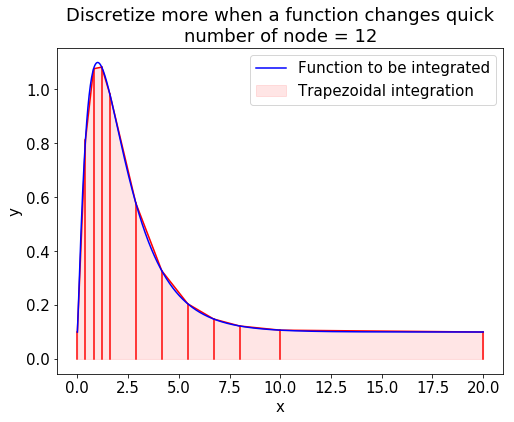

In [43]:
#use step size of 1
x2_node = x_non_lin
y2_node = y_non_lin
x2_base = np.zeros(x2_node.shape)

v2_line_start = [(i,j) for i,j in zip(x2_node,x2_base)]
v2_line_end = [(i,j) for i,j in zip(x2_node,y2_node)]

mpl.rc('font',size = 15)
plt.figure(figsize = (8,6))
plt.plot(x2_node,y2_node,'-r')
plt.fill_between(x2_node,y2_node,color = 'red', alpha = 0.1,
                 label = 'Trapezoidal integration')
for line in range(len(v2_line_end)):
    x2_line = [v2_line_start[line][0],v2_line_end[line][0]]
    y2_line = [v2_line_start[line][1],v2_line_end[line][1]]
    plt.plot(x2_line,y2_line, '-r')
plt.plot(x2,y2,'b-', label = 'Function to be integrated')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Discretize more when a function changes quick\nnumber of node = 12')
plt.show()

In [44]:
x_non_lin.shape

(12,)

In [45]:
ans_non_lin = trapz(y_non_lin,x_non_lin)
ans_non_lin

4.9878964877783698

In [46]:
error = (ans_non_lin-exc_ans)/exc_ans*100
print('non-uniform discretization with just 12 poitns give {:.2f}% relative error'.format(error))

non-uniform discretization with just 12 poitns give 0.72% relative error


# Benefit of discretize more when a function changes quick
<font size = 4><p> 
<p>1. Faster (use less points). Get high accuracy where it is needed
<p>2. More accurate result compared to the case that use the same number of points
<p>3. Less numerical error when adding small sections together
<p>What if we can discretize the domain into $10^{200}$ sections, then add the result together, will we get an accurate result?
<p>Answer: Generally no. More sections are better, but too many is not good. Area from each interval can have about 15 to 16 significante digits. Adding more numbers causing the error from addition to grow quickly!.
</font>

In [47]:
#Assum that the exact solution is 30
exact = 5

In [48]:
each_area = exact/1e7
each_area

5e-07

In [49]:
def err_ex(i):
    ans = 0
    each_area = exact/10**i
    for i in range(int(10**i)):
        ans += each_area
    return ans

In [50]:
err_mat = [(i,err_ex(i)) for i in range(8)]
print('(data to be added (10**i),   Addition result)')
err_mat

(data to be added (10**i),   Addition result)


[(0, 5.0),
 (1, 5.0),
 (2, 4.99999999999999),
 (3, 4.999999999999916),
 (4, 4.9999999999999485),
 (5, 4.999999999995016),
 (6, 4.999999999895295),
 (7, 4.999999999633759)]

In [51]:
relative_err = [abs((err_mat[i][1]-exact)/exact*100) for i in range(8)]
relative_err = np.array(relative_err)
relative_err

array([  0.00000000e+00,   0.00000000e+00,   1.95399252e-13,
         1.68753900e-12,   1.03028697e-12,   9.96713823e-11,
         2.09409379e-09,   7.32482519e-09])

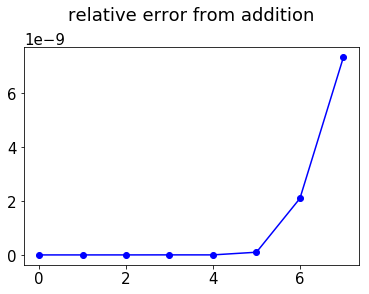

In [52]:
plt.plot(range(8),relative_err,'-ob')
plt.title('relative error from addition\n')
plt.show()

In [53]:
#error is increasing quickly!

# Simpson 1/3: (1 interval): Derivation overview
<font size = 5>
<p>
<p>1. Use quadratic polynomial to connect the dots, instead of using a straight line
<p>2. Use lagrange polynomial interpolation to get the function approximation formula
<p>$P(x) = f(a) \tfrac{(x-m)(x-b)}{(a-m)(a-b)} + f(m) \tfrac{(x-a)(x-b)}{(m-a)(m-b)} + f(b) \tfrac{(x-a)(x-m)}{(b-a)(b-m)}$
<p>3. Integrate the approximation formula, to get Simpson 1/3 rule
<p>$\int_{a}^{b} P(x) \, dx =\tfrac{b-a}{6}\left[f(a) + 4f\left(\tfrac{a+b}{2}\right)+f(b)\right]$
</font>
## Simpson 1/3: Multiple intervals (composite Simposon's rule)
## An even number of intervals is needed for this method.
<font size = 5><p>
$\int_a^b f(x) \, dx\approx\tfrac{h}{3}\bigg[f(x_0)+2\sum_{j=1}^{n/2-1}f(x_{2j})+
4\sum_{j=1}^{n/2}f(x_{2j-1})+f(x_n)
\bigg]$
</font>
https://en.wikipedia.org/wiki/Simpson%27s_rule

## Composite Simposon 1/3: Scipy

In [54]:
x_simps = np.linspace(0,20,21)
y_simps = fx2(x_simps)
sp.integrate.simps(y_simps, x_simps)

4.9288484690130456

In [55]:
x_simps = np.linspace(0,20,201)
y_simps = fx2(x_simps)
sp.integrate.simps(y_simps, x_simps)

4.952462118996424

In [56]:
x_simps = np.linspace(0,20,1001)
y_simps = fx2(x_simps)
sp.integrate.simps(y_simps, x_simps)

4.9522242064467701

In [57]:
exc_ans

4.9522192711083974

In [58]:
#Just 1000 sections (1001 points), get the result very close to 100000 points method

In [59]:
x_simps = np.linspace(0,20,10000001)
y_simps = fx2(x_simps)
exc_ans2 = sp.integrate.simps(y_simps, x_simps)
exc_ans2

4.9522192746100879

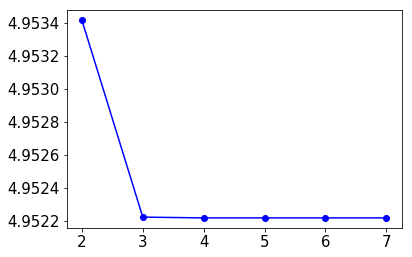

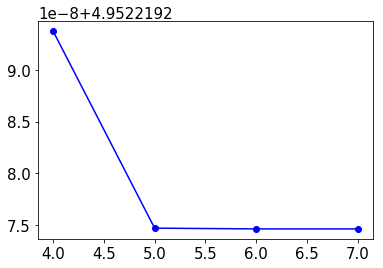

In [60]:
ans_list = []
for i in range(2,8):
    x_simps = np.linspace(0,20,10**i+1)
    y_simps = fx2(x_simps)
    ans = sp.integrate.simps(y_simps, x_simps)
    ans_list.append((i,ans))
ans_np = np.array(ans_list)
plt.figure()
plt.plot(ans_np[:,0],ans_np[:,1],'-ob')
plt.show()
plt.figure()
plt.plot(ans_np[2:,0],ans_np[2:,1],'-ob')
plt.show()

In [61]:
ans_list

[(2, 4.9534160044915359),
 (3, 4.9522242064467701),
 (4, 4.9522192937324618),
 (5, 4.9522192746854854),
 (6, 4.9522192746103793),
 (7, 4.9522192746100879)]

# Error from numerical integration

<font size = 5><p>
Composite Simpson method: $E=\mathcal{O(h^4)}$
<p>Composite Trapezoidal method: $E=\mathcal{O(h^2)}$
</font>

For Composit Simpson, exact answer is obtained for an integration of 3rd degree polynomial (or less)

In [62]:
fx3 = lambda x: x**3 + x**2 + x + 1
x_simps = np.linspace(0,20,21)
y_simps = fx3(x_simps)
ans_simp21 = sp.integrate.simps(y_simps, x_simps)
x_simps = np.linspace(0,20,201)
y_simps = fx3(x_simps)
ans_simp41 = sp.integrate.simps(y_simps, x_simps)
print(ans_simp21, ans_simp41)

42886.6666667 42886.6666667


In [63]:
#Analytical solution
fx3_exact = sm.integrate(xs**3+xs**2+xs+1,(xs,0,20)).evalf()
fx3_exact

42886.6666666667

<font size = 5>
What exactly is $E=\mathcal{O}(h^2)$ for trapezoidal method?
<p>Generally, when h is 10 times smaller, error = 100 times smaller!
</font>

In [64]:
x_ = np.linspace(0,20,10000)
y_ = fx3(x_)
ans1= trapz(y_, x_)
err1= ans1 - fx3_exact
ans1,err1

(42886.667080082683, 0.000413416019000579)

In [65]:
x_ = np.linspace(0,20,100000)
y_ = fx3(x_)
ans2 = trapz(y_, x_)
err2 = ans2 - fx3_exact
ans2,err2

(42886.666670800085, 4.13342058891430e-6)

In [66]:
err1/err2

100.017893197065

In [67]:
#When interval is 10 times smaller, error is 100 times smallers

<font size = 5>
What exactly is $E=\mathcal{O}(h^4)$ for Simpson method?
<p>Generally, when h is 10 times smaller, error = 10000 times smaller!
</font>

In [68]:
fx4 = lambda x: x**4 + x**3 + x**2 + x + 1

In [69]:
fx4_exact = sm.integrate(xs**4 + xs**3+xs**2+xs+1,(xs,0,20)).evalf()
fx4_exact

682886.666666667

In [70]:
x_ = np.linspace(0,20,11)
y_ = fx4(x_)
ans1= sp.integrate.simps(y_, x_)
err1= ans1 - fx4_exact
ans1,err1

(682929.33333333326, 42.6666666666279)

In [71]:
x_ = np.linspace(0,20,101)
y_ = fx4(x_)
ans2= sp.integrate.simps(y_, x_)
err2= ans2 - fx4_exact
ans2,err2

(682886.67093333334, 0.00426666671410203)

In [72]:
err1/err2

9999.99988881427

In [73]:
10**4

10000

In [74]:
#When interval is 10 times smaller, error is 10**4 times smallers

## Composite Simposon 1/3: Manual
$\int_a^b f(x) \, dx\approx\tfrac{h}{3}\bigg[f(x_0)+2\sum_{j=1}^{n/2-1}f(x_{2j})+
4\sum_{j=1}^{n/2}f(x_{2j-1})+f(x_n)
\bigg]$
<br> n is number of interval

In [75]:
class int_man():
    def __init__(self, fx, x_m, n):
        self.fx = fx
        self.x_m = x_m
        self.n = n
    def sim13m(self):
        return sim_13_m(self.fx, self.x_m, self.n)

def sim_13_m(fx, x_m, n):
    y_m = fx(x_m)
    h = x_m[1] - x_m[0]
    sum2 = np.array([y_m[2*j] for j in range(1,int(n/2-1+1))],
                    dtype = 'longfloat').sum()
    sum3 = np.array([y_m[2*j-1] for j in range(1,int(n/2+1))],
                    dtype = 'longfloat').sum()
    simp_m = h/3 * (y_m[0] + 2 * sum2 + 4 * sum3 + y_m[-1])
    return simp_m

n = 20
cal_fx3 = int_man(fx3, np.linspace(0,20,n+1), n)
print('{:.10f}'.format(cal_fx3.sim13m()))
print('{:.10f}'.format(sim_13_m(fx3, np.linspace(0,20,n+1), n)))

42886.6666666667
42886.6666666667


In [76]:
fx3_exact

42886.6666666667

In [77]:
def simp_in_fn(fx,x):
    return simps(fx(x),x)

In [78]:
%%timeit -n 10 -r 3
simps(fx3(np.linspace(0,20,21)),np.linspace(0,20,21))

10 loops, best of 3: 140 µs per loop


In [79]:
t1 = time.monotonic()
for i in range(10000):
    simps(fx3(np.linspace(0,20,21)),np.linspace(0,20,21))
t2 = time.monotonic()
time_numpy_manual = t2-t1
print('scipy simps')
time_numpy_manual

scipy simps


0.6734330859908368

In [80]:
simp_in_fn(fx3,np.linspace(0,20,21))

42886.666666666664

In [81]:
t1 = time.monotonic()
for i in range(10000):
    simp_in_fn(fx3,np.linspace(0,20,21))
t2 = time.monotonic()
time_numpy_manual = t2-t1
print('scipy simps in function')
time_numpy_manual

scipy simps in function


0.5315435919910669

In [82]:
%%timeit -n 10 -r 3
sim_13_m(fx3, np.linspace(0,20,21), 20)

10 loops, best of 3: 50.4 µs per loop


In [83]:
t1 = time.monotonic()
for i in range(10000):
    sim_13_m(fx3, np.linspace(0,20,21), 20)
t2 = time.monotonic()
time_numpy_manual = t2-t1
print('sim_13_m fn')
time_numpy_manual

sim_13_m fn


0.47913683200022206

In [84]:
%%timeit -n 10 -r 3
cal_fx3 = int_man(fx3, np.linspace(0,20,21), 20)
cal_fx3.sim13m()

10 loops, best of 3: 52.8 µs per loop


In [85]:
t1 = time.monotonic()
for i in range(10000):
    cal_fx3 = int_man(fx3, np.linspace(0,20,21), 20)
    cal_fx3.sim13m()
t2 = time.monotonic()
time_numpy_manual = t2-t1
print('int_man class')
time_numpy_manual

int_man class


0.5170318769814912

## Composite Simposon 3/8
https://en.wikipedia.org/wiki/Simpson%27s_rule#Simpson.27s_3.2F8_rule <br>
http://mathforcollege.com/nm/mws/gen/07int/mws_gen_int_txt_simpson3by8.pdf <br>
http://mathfaculty.fullerton.edu/mathews/n2003/Simpson38RuleMod.html
<br><font size = 5>
<p>One Interval<p>
$\int_{a}^{b} f(x) \, dx \approx \tfrac{3h}{8}\left[f(a) + 3f\left(\tfrac{2a+b}{3}\right) + 3f\left(\tfrac{a+2b}{3}\right) + f(b)\right] \\
\int_{a}^{b} f(x) \, dx \approx \tfrac{(b-a)}{8}\left[f(a) + 3f\left(\tfrac{2a+b}{3}\right) + 3f\left(\tfrac{a+2b}{3}\right) + f(b)\right]$
<p>Multiple Intervals<p>
$\int_a^b f(x) \, dx\approx\tfrac{3h}{8}\bigg[f(x_0)+3\sum_{i=1,4,7,...}^{n-1}f(x_{i})+ \\
3\sum_{i=2,5,8,...}^{n-1}f(x_{i})+2\sum_{i=3,6,9,...}^{n-3}f(x_i) + f(x_n)
\bigg]$
<br>or for $h = \frac{b-a}{3m}$<br><br>
$\int_a^b f(x) \, dx \approx \frac{3h}{8}\sum_{k=1}^{m}(f(x_{3k-3}+3f(x_{3k-2})+3f(x_{3k-1})+f(x_{3k}))$
<p> We need 3m interval (multiplication of 3) for Simpson 3/8
</font>

In [86]:
n = 21
m = int(n/3)
h = 20/n
x_38 = np.linspace(0,20,n+1)
y_38 = fx3(x_38)
sum_all = sum([y_38[3*k-3] + 3 * y_38[3*k-2] + 3 * y_38[3*k-1] + y_38[3*k] for k in range(1,m+1)])
sim_38 = 3 * h / 8 * sum_all
sim_38

42886.666666666657

In [87]:
fx3_exact

42886.6666666667

In [88]:
#Exact numerical value of polynomial degree 3 (or lower) integration can be obtained by both Simpson method
#If number of interval is even, use Simpson 1/3
#If the number of interval is the multiplication of 3 use Simpson 3/8

# Double Integration
<p>
<font size = 5>
fxy1 = $\int_1^3\int_{12}^{16} 1 \, dx dy$<p>
fxy2 = $\int_1^3\int_{12}^{16} x^2+7y \, dx dy$ <p>
fxy3 = $\int_1^3\int_{12}^{y} x^2+7y \, dx dy$
</font>

In [89]:
xs, ys = sm.symbols('x y')

## Analytical solution of fxy1

In [90]:
Exy1 = sm.integrate(1,(xs,12,16),(ys,1,3))
Exy1

8

## Analytical solution of fxy2

In [91]:
Exy2 = sm.integrate(xs**2+7*ys,(xs,12,16),(ys,1,3))
Exy2

5072/3

In [92]:
Exy2_sm = sm.integrate(xs**2+7*ys,(xs),(ys))
Exy2_sm

x**3*y/3 + 7*x*y**2/2

In [93]:
Exy2_xT = Exy2_sm.subs({xs:16})
Exy2_xT

56*y**2 + 4096*y/3

In [94]:
Exy2_xB = Exy2_sm.subs({xs:12})
Exy2_xB

42*y**2 + 576*y

In [95]:
Exy2_y_ori = Exy2_xT - Exy2_xB
Exy2_y_ori

14*y**2 + 2368*y/3

In [96]:
Exy2_y_ori.subs({ys:3}) - Exy2_y_ori.subs({ys:1})

5072/3

## Analytical solution of fxy3

In [97]:
Exy3 = sm.integrate(xs**2+7*ys,(xs,12,ys),(ys,1,3))
Exy3

-4262/3

In [98]:
Exy3_sm = sm.integrate(xs**2+7*ys,(xs,12,ys))
Exy3_sm

y**3/3 + 7*y**2 - 84*y - 576

In [99]:
Exy3_final = sm.integrate(Exy3_sm,(ys,1,3))
Exy3_final

-4262/3

In [100]:
-4262/3

-1420.6666666666667

## Scipy double integration (dblquad) for fxy1

In [101]:
fxy1 = lambda x,y: 1
sp.integrate.dblquad(fxy1,1,3,lambda y:12, lambda y:16)

(8.0, 8.881784197001252e-14)

## Scipy double integration (dblquad) for fxy2

In [102]:
fxy2 = lambda x,y: x**2+7*y
sp.integrate.dblquad(fxy2,1,3,lambda y:12, lambda y:16)

(1690.6666666666667, 1.8770170602995982e-11)

In [103]:
5072/3

1690.6666666666667

## Scipy double integration (dblquad) for fxy3

In [104]:
fxy3 = lambda x,y: x**2+7*y
sp.integrate.dblquad(fxy3,1,3,lambda y:12, lambda y:y)

(-1420.6666666666665, 1.5772568436508056e-11)

In [105]:
-4262/3
#same answer as sympy

-1420.6666666666667

## Scipy double integration with simps twice! (fxy3)
### First, calculate $\int_{12}^y f(x,y) \, dx$ for every y in np.linspace(1,3,11) <br> Then use this value to do the outer integration

In [106]:
y_fxy3 = np.linspace(1,3,11)
fxy3 = lambda x,y: x**2+7*y
# fy3 is the integration for x = 12 to y at a certain y
fy3 = lambda y: simps(fxy3(np.linspace(12,y,11),y),np.linspace(12,y,11))
simps([fy3(i) for i in y_fxy3],y_fxy3)

-1420.666666666667

In [107]:
#Notice that the exact solution can be optained in double integration too

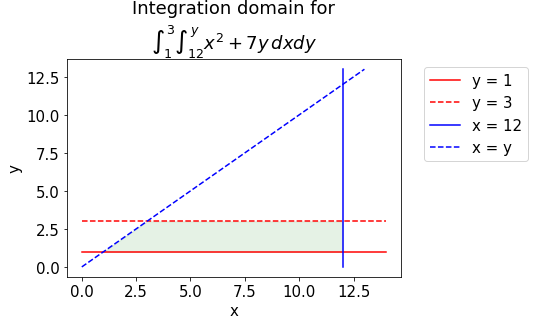

Integration direction is from solid to dash line, starting with blue line


In [108]:
plt.plot([0,14],[1,1],'-r',label='y = 1')
plt.plot([0,14],[3,3],'--r',label='y = 3')
plt.plot([12,12],[0,13],'-b',label='x = 12')
plt.plot([0,13],[0,13],'--b',label='x = y')
plt.fill_between([1,3,12],[1,3,3],[1,1,1],color = 'green', alpha = 0.1)
plt.legend(bbox_to_anchor=(1.4, 1))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Integration domain for\n$\int_1^3\int_{12}^{y} x^2+7y \, dx dy$')
plt.show()
print('Integration direction is from solid to dash line, starting with blue line')

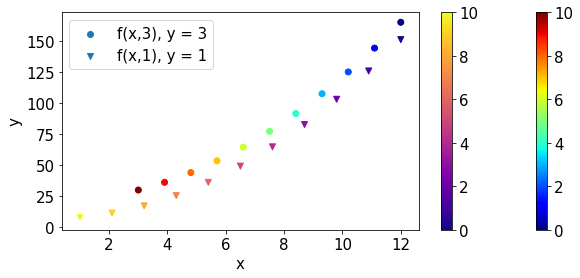

Color indicates the order of the dot
We are integrating backward from 12 to y


In [109]:
x_plot = np.linspace(12,3,11)
x_plot2 = np.linspace(12,1,11)
plt.figure(figsize = (10,4))
plt.scatter(x_plot,fxy3(x_plot,3), c = range(11),
            cmap = 'jet',label='f(x,3), y = 3')
plt.colorbar()
plt.scatter(x_plot2,fxy3(x_plot2,1), marker='v', 
            c = range(11),cmap = 'plasma',label='f(x,1), y = 1')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print('Color indicates the order of the dot\nWe are integrating backward from 12 to y')